<a href="https://colab.research.google.com/github/OlyaMizonova/training-with-ml/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузить в датафрейм+
2. Построить пару графиков - зависимостей признаков друг от друга (можно поменять цвета, шрифты и все такое)

(в этих данных такого нет :[ ) 3. Поискать пропущенные значения и поработать с ними (удалить/заменить)
4. Бонус - поискать выбросы с помощью квантилей и попутно разобраться, что же это такое +
5. Закодировать категориальные переменные, если они есть+
7. Разделить на тренировочную и тестовую выборки+
8. Попробовать следующие модели:

 Регрессия:
 $$
 8.1 KNN+\\
 8.2 Linear Regression+\\
 8.3 SVR+\\
 8.4 Decision Tree+\\
 8.5 Random Forest+\\
 8.6 Gradient Boosting (библиотека CatBoost или xgboost)\\
 $$

9. Для каждой модели попробовать перебрать её гиперпараметры (их можно найти в документации). Перебора из 3 значений хватит, но вас никто не ограничивает в поиске лучшей модели
10. Для задачи регрессии использовать  - MSE и MAE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps

In [3]:
dataset = pd.read_csv('data.csv', encoding='latin-1')

In [4]:
outcome=pd.DataFrame(columns=['method','MAE','MSE'])

In [ ]:
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
len(dataset['country'].unique())#можно убрать

1

In [5]:
dataset=dataset.drop(['country'], axis=1) #непонятно вообще можно ли как то посчитать корреляцию между не числовыми признаками...
dataset=dataset.drop(['statezip'], axis=1)
dataset=dataset.drop(['date'], axis=1)
dataset=dataset.drop(['street'], axis=1)
dataset=dataset.drop(['city'], axis=1)

попробуем закодировать города, штаты, дату и улицы уберем(это не привело ни к чему хорошему, поэтому я убрала)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


In [6]:
def norm(y):
  meanY=np.mean(y)
  stdY=np.std(y)
  for i in range (0,len(y)):
    y[i]=(y[i]-meanY)/stdY

пропробуем LinearRegression

In [7]:
Y = list(dataset['price'])
X = dataset.drop(['price'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [10]:
norm(Y_test)
norm(Y_train)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [15]:
mean_absolute_error(Y_test,model.predict(X_test))

0.31756116297853015

In [16]:
mean_squared_error(Y_test,model.predict(X_test))

0.7479806655662246

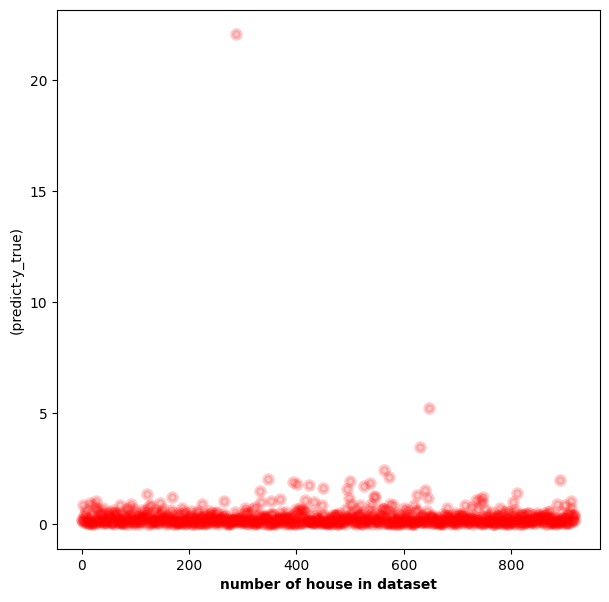

In [17]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('number of house in dataset', fontweight='bold')
plt.ylabel('(predict-y_true)')
plt.show()

почистим цену от выбросов

In [18]:
price_0_95_quant = np.quantile(dataset['price'], .95)
price_0_05_quant = np.quantile(dataset['price'], .05)
print(price_0_95_quant, price_0_05_quant)

1184050.0000000002 200000.0


In [19]:
indToDrop=[]
for i in range (len(dataset['price'])):
  if(dataset['price'][i] > price_0_95_quant or dataset['price'][i]<price_0_05_quant):
    indToDrop.append(i)

In [20]:
dataset=dataset.drop(indToDrop, axis=0)

In [21]:
dataset = dataset.reset_index()

почистим теперь жилую площадь от выбросов

In [22]:
stliv_0_95_quant = np.quantile(dataset['sqft_living'], .95)
stliv_0_05_quant = np.quantile(dataset['sqft_living'], .05)
print(stliv_0_95_quant, stliv_0_05_quant)

3550.0 971.0000000000002


In [23]:
indToDrop=[]
for i in range (len(dataset['sqft_living'])):
  if(dataset['sqft_living'][i] > stliv_0_95_quant or dataset['sqft_living'][i]<stliv_0_05_quant):
    indToDrop.append(i)

In [24]:
dataset=dataset.drop(indToDrop, axis=0)
dataset = dataset.reset_index()

In [25]:
dataset=dataset.drop(['level_0'],axis=1)
dataset=dataset.drop(['index'],axis=1)

снова попробуем LinearRegression

In [26]:
Y = list(dataset['price'])
X = dataset.drop(['price'], axis=1)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [28]:
norm(Y_test)
norm(Y_train)

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, Y_train)

LinearRegression()

In [31]:
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions),dtype=np.float64)

In [32]:
mae(Y_test,model.predict(X_test))

0.6182128364945214

In [33]:
root_mean_squared_error(Y_test,model.predict(X_test))

0.789102850390333

In [34]:
mean_absolute_error(Y_test,model.predict(X_test))

0.6182128364945214

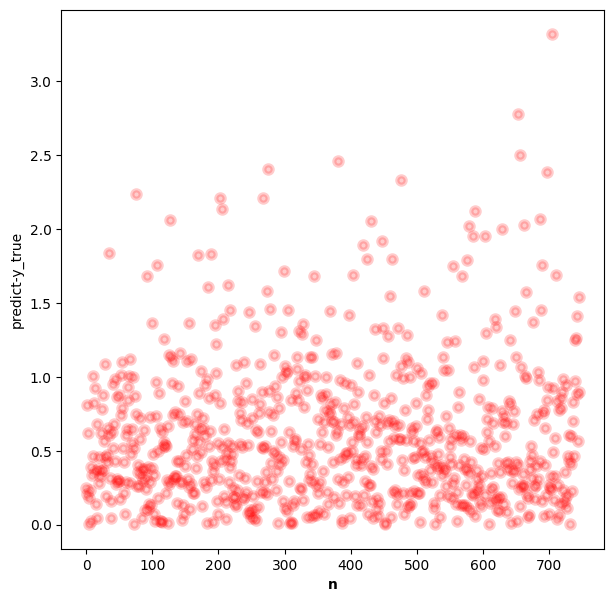

In [35]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

стало чуть лучше

In [36]:
stlot_0_95_quant = np.quantile(dataset['sqft_lot'], .95)
stlot_0_05_quant = np.quantile(dataset['sqft_lot'], .05)
print(stlot_0_95_quant, stlot_0_05_quant)

39639.0 1570.8


In [ ]:
#почистим еще площади участков

In [37]:
indToDrop=[]
for i in range (len(dataset['sqft_lot'])):
  if(dataset['sqft_lot'][i] > stlot_0_95_quant or dataset['sqft_lot'][i]<stlot_0_05_quant):
    indToDrop.append(i)

In [38]:
dataset=dataset.drop(indToDrop, axis=0)
dataset = dataset.reset_index()

In [39]:
dataset=dataset.drop(['index'],axis=1)

In [ ]:
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
2,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
3,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
4,335000.000000,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
3352,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
3353,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
3354,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [40]:
dataset['waterfront'].unique()

array([0, 1])

In [41]:
dataset=dataset.drop(['waterfront'],axis=1)

наверное заменю площади подвала и чердака просто фактом их наличия

In [42]:
for i in range (len(dataset['sqft_above'])):
  if(dataset['sqft_above'][i]!=0):
    dataset['sqft_above'][i]=1
  if(dataset['sqft_basement'][i]!=0):
    dataset['sqft_basement'][i]=1

Выходные данные были обрезаны до нескольких последних строк (5000).
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['sqft_above'][i]=1
<ipython-input-42-6597c41d110e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sqft_above'][i]=1
<ipython-input-42-6597c41d110e>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you a

годы постройки и реконструкции заменю на "возраст"

In [43]:
ageBuilding=[]
for i in range (len(dataset['yr_built'])):
  if(dataset['yr_renovated'][i]!=0):
    ageBuilding.append(2024-dataset['yr_renovated'][i])
  else:
    ageBuilding.append(2024-dataset['yr_built'][i])

In [44]:
ageB=pd.DataFrame({'ageOfTheBuilding':ageBuilding})

In [45]:
dataset = pd.concat([dataset, ageB], axis=1)

In [46]:
dataset=dataset.drop(['yr_built'],axis=1)
dataset=dataset.drop(['yr_renovated'],axis=1)

In [ ]:
#и еще раз попробуем Linear Regression

In [47]:
Y = list(dataset['price'])
X = dataset.drop(['price'], axis=1)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [49]:
norm(Y_test)
norm(Y_train)

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train, Y_train)

LinearRegression()

In [52]:
maelr= mae(Y_test,model.predict(X_test))

In [53]:
mselr=root_mean_squared_error(Y_test,model.predict(X_test))

In [54]:
outcome.loc[0]=["Linear Regression"]+[ maelr]+ [mselr]

In [55]:
outcome

,method,MAE,MSE
0,Linear Regression,0.643187,0.811559


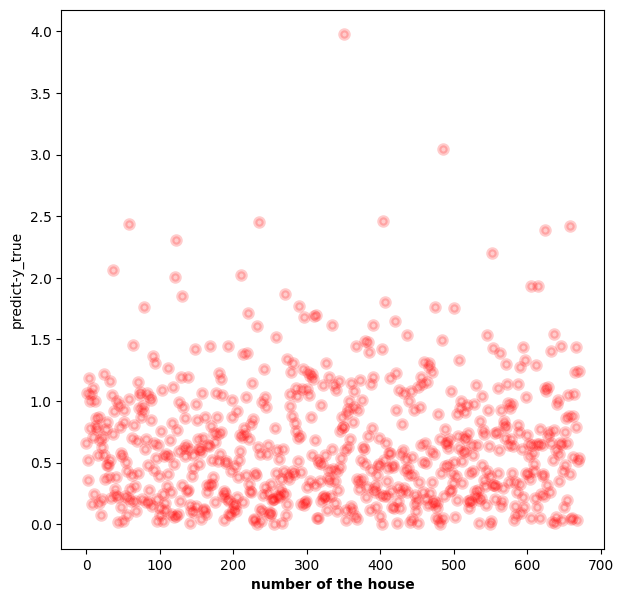

In [56]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('number of the house', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

In [57]:
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,ageOfTheBuilding
0,313000.000000,3.0,1.50,1340,7912,1.5,0,3,1,0,19
1,342000.000000,3.0,2.00,1930,11947,1.0,0,4,1,0,58
2,420000.000000,3.0,2.25,2000,8030,1.0,0,4,1,1,61
3,550000.000000,4.0,2.50,1940,10500,1.0,0,4,1,1,32
4,335000.000000,2.0,2.00,1350,2560,1.0,0,3,1,0,48
...,...,...,...,...,...,...,...,...,...,...,...
3351,308166.666667,3.0,1.75,1510,6360,1.0,0,4,1,0,45
3352,534333.333333,3.0,2.50,1460,7573,2.0,0,3,1,0,15
3353,416904.166667,3.0,2.50,3010,7014,2.0,0,3,1,0,15
3354,203400.000000,4.0,2.00,2090,6630,1.0,0,3,1,1,50


попробуем другие модели

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [59]:
model=KNeighborsRegressor(n_neighbors=5)

In [60]:
model.fit(X_train, Y_train)

KNeighborsRegressor()

In [61]:
minmaeknn=mae(Y_test,model.predict(X_test))

In [62]:
minmseknn=root_mean_squared_error(Y_test,model.predict(X_test))

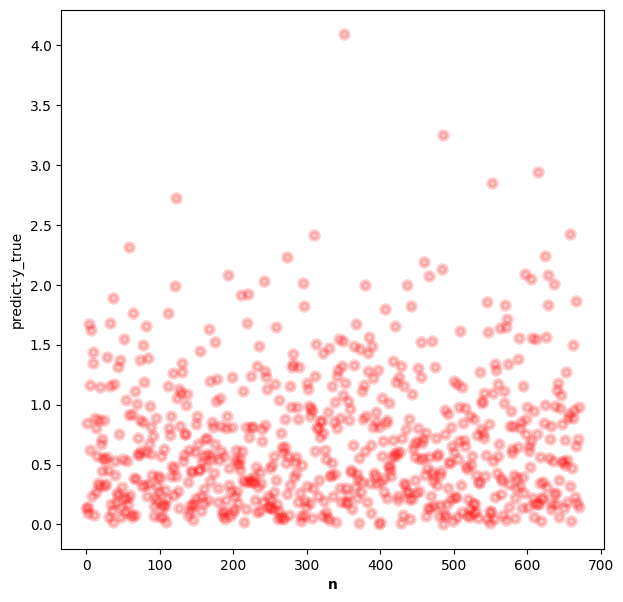

In [63]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

In [64]:
for n in [7,10,25]:
  model=KNeighborsRegressor(n_neighbors=n)
  model.fit(X_train, Y_train)
  maee=mae(Y_test,model.predict(X_test))
  msee=root_mean_squared_error(Y_test,model.predict(X_test))
  if(minmaeknn>maee):
    minmaeknn=maee
  if(minmseknn>msee):
    minmseknn=msee
  print(maee,msee)

0.6886013246664594 0.874649919995074
0.6704086383144772 0.8630973085198046
0.6694688362546641 0.8556794421041444


In [65]:
outcome.loc[1]=["KNeighbors"]+[minmaeknn]+ [minmseknn]

In [ ]:
outcome

,method,MAE,MSE
0,Linear Regression,0.630200,0.786432
1,KNeighbors,0.676652,0.837898


попробуем svr


In [66]:
from sklearn.svm import SVR

In [67]:
svr = SVR()#kernel='linear'
svr.fit(X_train, Y_train)

SVR()

In [68]:
minmaesvr=mae(Y_test,svr.predict(X_test))

In [69]:
minmsesvr=root_mean_squared_error(Y_test,svr.predict(X_test))

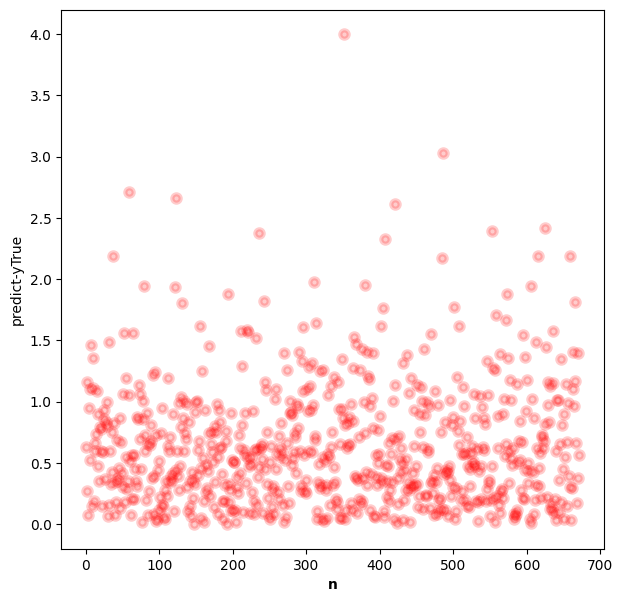

In [70]:
plt.figure(figsize=(7,7))
preds=svr.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-yTrue')
plt.show()

In [ ]:
outcome.loc[2]=["SVR"]+[minmaesvr]+ [minmsesvr]

попробуем Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [72]:
minmaedt=mae(Y_test,model.predict(X_test))

In [73]:
minmsedt=root_mean_squared_error(Y_test,model.predict(X_test))

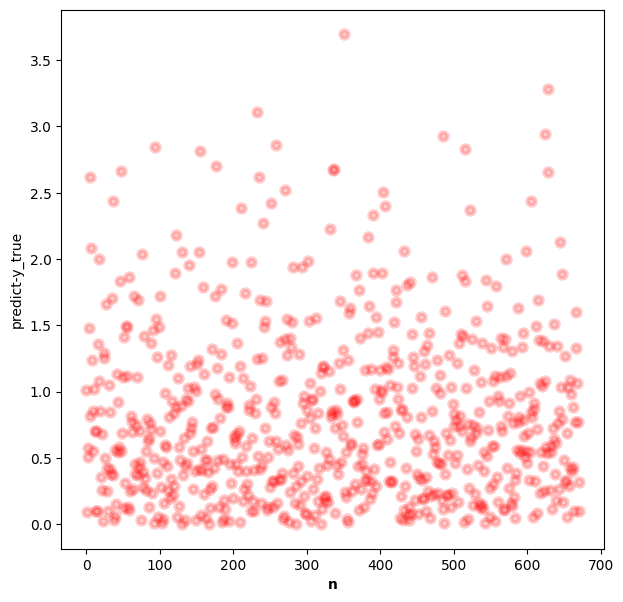

In [74]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

In [75]:
outcome.loc[3]=["Decision Tree"]+[minmaedt]+ [minmsedt]

попробуем Random Forest


In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [78]:
maerf=mae(Y_test,model.predict(X_test))

In [79]:
mserf=root_mean_squared_error(Y_test,model.predict(X_test))

In [80]:
outcome.loc[4]=["Random Forest"]+[maerf]+ [mserf]

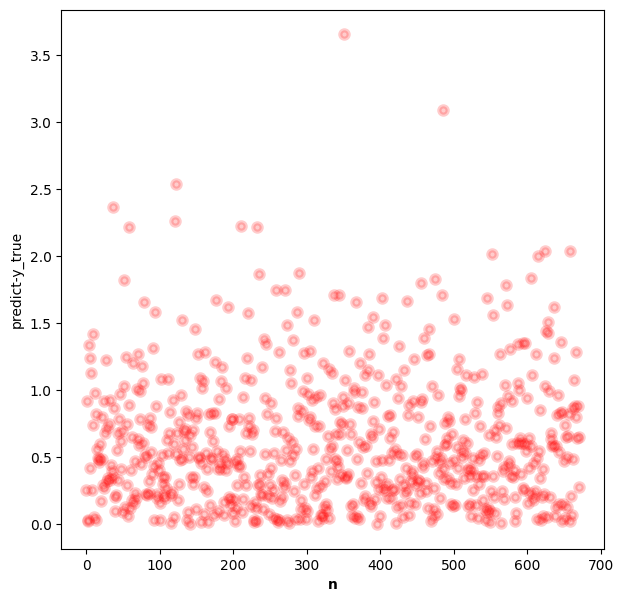

In [81]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

In [82]:
#Gradient Boosting

In [83]:
from xgboost import XGBRegressor

In [84]:
model = XGBRegressor()

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
maegb=mae(Y_test,model.predict(X_test))

In [86]:
msegb=root_mean_squared_error(Y_test,model.predict(X_test))

In [87]:
outcome.loc[5]=["Gradient Boosting"]+[maegb]+ [msegb]

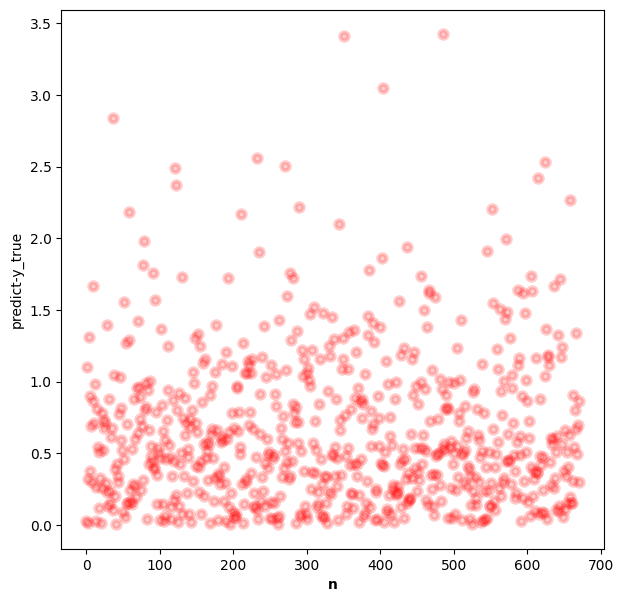

In [88]:
plt.figure(figsize=(7,7))
preds=model.predict(X_test)
xs=[x for x in range(0,len(Y_test))]
ys=abs(Y_test-preds)
plt.scatter(xs,ys, color='red', linewidth=3, alpha=0.2)
plt.xlabel('n', fontweight='bold')
plt.ylabel('predict-y_true')
plt.show()

In [89]:
outcome

,method,MAE,MSE
0,Linear Regression,0.643187,0.811559
1,KNeighbors,0.669469,0.855679
3,Decision Tree,0.821155,1.043918
4,Random Forest,0.628985,0.800846
5,Gradient Boosting,0.655213,0.847537


Random Forest сработал лучше всего